In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import SCM6
import cartopy.crs as ccrs
import matplotlib.colors as colors
import paleoclim_leeds.hadcm3_processing as hcm3
import paleoclim_leeds.zones as zones

# BUGS

In [5]:
amoc = hcm3.MERIDATS('xosfb', 2552, 2562).atlantic(mode_t='mean', zone=zones.Box(lat_min=-20, z_min=-3000))
amoc

__ Importation of <class 'paleoclim_leeds.hadcm3_processing.MERIDATS'> : xosfb between years 2552 and 2562.
Time elapsed for open_dataset : 0.040094852447509766
Time elapsed for crop start year : 0.511070728302002
Time elapsed for crop start and end years : 0.5779330730438232
Time elapsed for crop start and end years and months : 0.578019380569458
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing meridional Overturning Stream Function (Atlantic).
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


None; None
None; None
None; None
lat: [-20.0; -18.75; ...; 87.5; 88.75; 88]; lat_p: [-20.0; -18.75; ...; 87.5; 88.75; 88]
latb: [-19.375; -18.125; ...; 88.125; 89.375; 88]; latb_p: [-19.375; -18.125; ...; 88.125; 89.375; 88]
lats: [1.25; 1.25; ...; 1.25; 1.25; 143]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-2423.800048828125; -1808.5; ...; -10.0; -0.0; 16]; z_p: [-2423.800048828125; -1808.5; ...; -10.0; -0.0; 16]
zb: [-2731.39990234375; -2116.14990234375; ...; -5.0; 5.0; 17]; zb_p: [-2731.39990234375; -2116.14990234375; ...; -5.0; 5.0; 17]
zs: [615.2998046875; 615.2998046875; ...; 10.0; 10.0; 21]; zs_p: [615.2998046875; 615.2998046875; ...; 10.0; 10.0; 21]
None
DATA: <xarray.DataArray 'Merid_Atlantic' (z: 16, latitude: 88)>
array([[-6.9115716e-01, -4.5665416e-01, -6.0797679e-01, ...,
        -1.3288340e-02, -1.9127334e-04,            nan],
       [ 4.7057281e+00,  4.9706187e+00,  4.9294934e+00, ...,
         6.1198082e-03, -8.0624864e-02,            nan],
       [ 1.0628876e+01, 

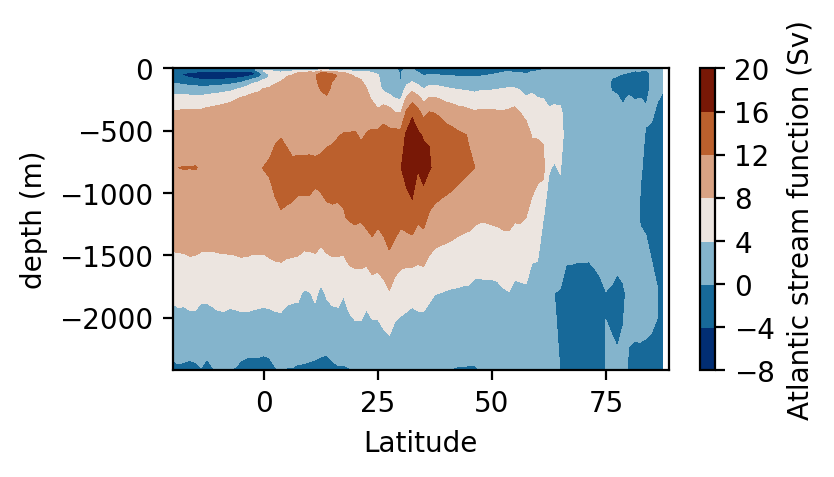

In [6]:
figMap = plt.figure(figsize=(4,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1)

cm = axMap.contourf(amoc.lat_p, amoc.z_p, amoc.values(), cmap=SCM6.vik)
axMap.set_xlabel('Latitude')
axMap.set_ylabel('depth (m)')
figMap.colorbar(mappable=cm, ax=axMap, label="Atlantic stream function (Sv)")

In [7]:
temperature = hcm3.OCNTATS('xosfb', 2552, 2562).temperature(mode_t='mean', mode_lon='mean')
temperature

__ Importation of <class 'paleoclim_leeds.hadcm3_processing.OCNTATS'> : xosfb between years 2552 and 2562.
Time elapsed for open_dataset : 0.029770612716674805
Time elapsed for crop start year : 29.48998212814331
Time elapsed for crop start and end years : 33.49227595329285
Time elapsed for crop start and end years and months : 33.49237012863159
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing sea water temperature (annual).
____ Coordinate imported in the GeoDataArray instance.


None; None
None; None
None; None
lat: [-89.375; -88.125; ...; 88.125; 89.375; 144]; lat_p: [-89.375; -88.125; ...; 89.375; 90.625; 145]
latb: [-90.0; -88.75; ...; 88.75; 90.0; 145]; latb_p: [-90.0; -88.75; ...; 90.0; 91.25; 146]
lats: [1.25; 1.25; ...; 1.25; 1.25; 144]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 145]
z: [-4884.7998046875; -4269.52490234375; ...; -20.0; -10.0; 19]; z_p: [-4884.7998046875; -4269.52490234375; ...; -20.0; -10.0; 19]
zb: [-5192.4501953125; -4577.14990234375; ...; -15.0; -5.0; 20]; zb_p: [-5192.4501953125; -4577.14990234375; ...; -15.0; -5.0; 20]
zs: [615.30029296875; 615.25; ...; 10.0; 10.0; 19]; zs_p: [615.30029296875; 615.25; ...; 10.0; 10.0; 19]
None
DATA: <xarray.DataArray 'temp_ym_dpth' (z: 20, latitude: 144)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,  0.00562179,
         0.00978504,         nan],
       [        nan,         nan,         nan, ...,

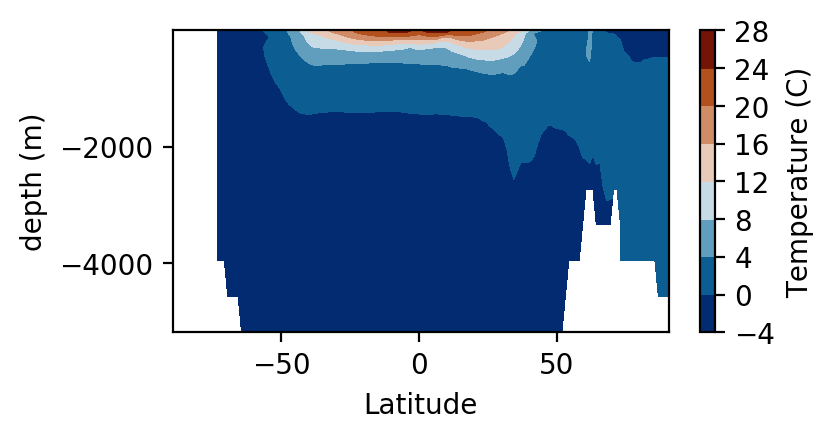

In [8]:
figMap = plt.figure(figsize=(4,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1)

cm = axMap.contourf(temperature.lat_p, temperature.zb_p, temperature.values(), cmap=SCM6.vik)
axMap.set_xlabel('Latitude')
axMap.set_ylabel('depth (m)')
figMap.colorbar(mappable=cm, ax=axMap, label="Temperature (C)")

In [2]:
temperature = hcm3.OCNYDS('xosfb', 2552, 2562).temperature(mode_t='mean', mode_lon='mean')
temperature

__ Importing <class 'paleoclim_leeds.hadcm3_processing.OCNYDS'>
____ Paths generated for xosfb between years 2552 and 2562.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing temperature.
____ Coordinate imported in the GeoDataArray instance.


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


None; None
None; None
None; None
lat: [-89.375; -88.125; ...; 88.125; 89.375; 144]; lat_p: [-89.375; -88.125; ...; 89.375; 90.625; 145]
latb: [-88.75; -87.5; ...; 87.5; 88.75; 143]; latb_p: [-90.0; -88.75; ...; 88.75; 90.0; 145]
lats: [1.25; 1.25; ...; 1.25; 1.25; 142]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-4884.7998046875; -4269.5; ...; -20.0; -10.0; 19]; z_p: [-4884.7998046875; -4269.5; ...; -20.0; -10.0; 19]
zb: [-5192.4501953125; -4577.14990234375; ...; -15.0; -5.0; 20]; zb_p: [-5192.4501953125; -4577.14990234375; ...; -15.0; -5.0; 20]
zs: [615.30029296875; 615.25; ...; 10.0; 10.0; 19]; zs_p: [615.30029296875; 615.25; ...; 10.0; 10.0; 19]
None
DATA: <xarray.DataArray 'temp_ym_dpth' (zb: 20, latitude: 144)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,  0.00562179,
         0.00978504,         nan],
       [        nan,         nan,         nan, ...,  0.07929675,
     

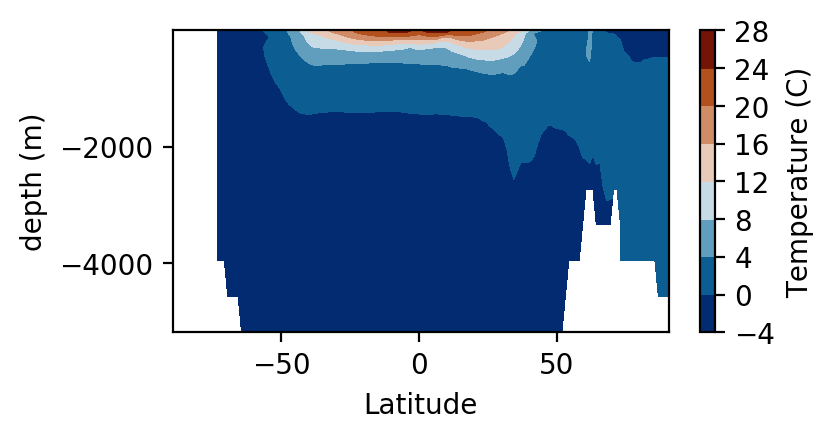

In [3]:
figMap = plt.figure(figsize=(4,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1)

cm = axMap.contourf(temperature.lat_p, temperature.zb_p, temperature.values(), cmap=SCM6.vik)
axMap.set_xlabel('Latitude')
axMap.set_ylabel('depth (m)')
figMap.colorbar(mappable=cm, ax=axMap, label="Temperature (C)")